In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import json
import requests
from scipy.stats import linregress

In [3]:
rides_df = pd.read_csv("VFH_edited.csv")
rides_df["MYDATE"] = pd.to_datetime(rides_df["MYDATE"])
rides_df.head()

,COMPANY_ID,PICKUP_TIME,TRIP_MILES,TRIP_TIME,P_TIP,DOW,PICKUP_DAY,MYDATE,TOTAL,TIP%,Borough,precip,TEMP_F,HOLIDAY,WEATHER
0,HV0005,1/18/2021 0:37,1.690,487,0.0,0,Mon,2021-01-18,13.45,0.0,Manhattan,0.0,41.18,1,Good
1,HV0005,1/23/2021 15:17,2.865,854,0.0,5,Sat,2021-01-23,15.41,0.0,Manhattan,0.0,30.20,0,Good
2,HV0003,1/28/2021 5:59,1.490,370,0.0,3,Thurs,2021-01-28,7.79,0.0,Brooklyn,0.0,28.76,0,Good
3,HV0003,1/5/2021 19:24,5.550,942,0.0,1,Tues,2021-01-05,24.66,0.0,Brooklyn,0.0,38.84,0,Good
4,HV0005,1/24/2021 0:24,1.077,455,0.0,6,Sun,2021-01-24,10.35,0.0,Brooklyn,0.0,27.32,0,Good


The r-value is: 0.2184750611844878


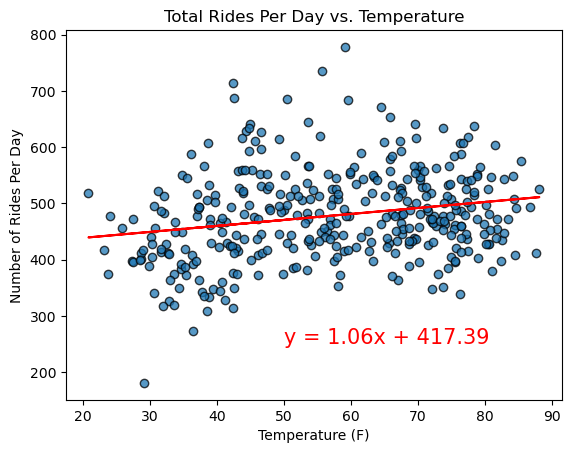

In [27]:
# Ride Count Per Day vs. Temp
daily_temp = rides_df.groupby(["MYDATE"])["TEMP_F"].unique()
ride_count = rides_df.groupby(["MYDATE"])["PICKUP_DAY"].count()
x_values = daily_temp.astype(float)
y_values = ride_count.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50, 250) ,fontsize=15,color="red")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Rides Per Day")
plt.title("Total Rides Per Day vs. Temperature")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.06041299690985074


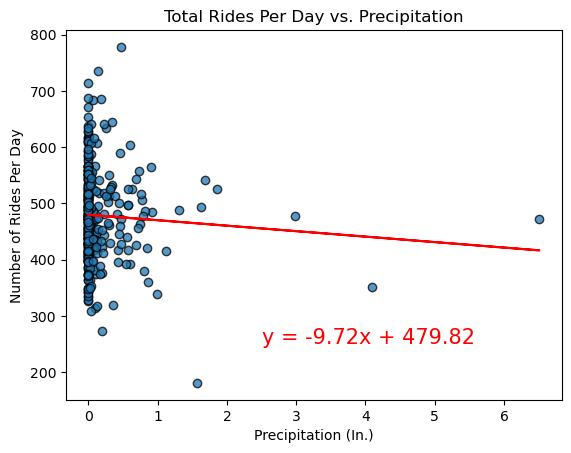

In [26]:
# Ride Count Per Day vs. Precip
daily_precip = rides_df.groupby(["MYDATE"])["precip"].unique()
ride_count = rides_df.groupby(["MYDATE"])["PICKUP_DAY"].count()
precip_inches = daily_precip / 25.4
x_values = precip_inches.astype(float)
y_values = ride_count.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (2.5, 250) ,fontsize=15,color="red")
plt.xlabel("Precipitation (In.)")
plt.ylabel("Number of Rides Per Day")
plt.title("Total Rides Per Day vs. Precipitation")
print(f"The r-value is: {rvalue}")
plt.show()

In [6]:
rides_df.head()

,COMPANY_ID,PICKUP_TIME,TRIP_MILES,TRIP_TIME,P_TIP,DOW,PICKUP_DAY,MYDATE,TOTAL,TIP%,Borough,precip,TEMP_F,HOLIDAY,WEATHER
0,HV0005,1/18/2021 0:37,1.690,487,0.0,0,Mon,2021-01-18,13.45,0.0,Manhattan,0.0,41.18,1,Good
1,HV0005,1/23/2021 15:17,2.865,854,0.0,5,Sat,2021-01-23,15.41,0.0,Manhattan,0.0,30.20,0,Good
2,HV0003,1/28/2021 5:59,1.490,370,0.0,3,Thurs,2021-01-28,7.79,0.0,Brooklyn,0.0,28.76,0,Good
3,HV0003,1/5/2021 19:24,5.550,942,0.0,1,Tues,2021-01-05,24.66,0.0,Brooklyn,0.0,38.84,0,Good
4,HV0005,1/24/2021 0:24,1.077,455,0.0,6,Sun,2021-01-24,10.35,0.0,Brooklyn,0.0,27.32,0,Good


The r-value is: 0.6254556659091998


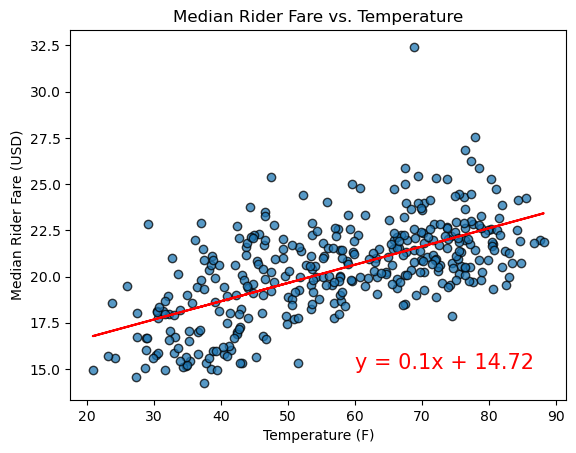

In [18]:
# Median Rider Fare vs. Temp (grouped by day)
daily_temp = rides_df.groupby(["MYDATE"])["TEMP_F"].unique()
med_fares = rides_df.groupby(["MYDATE"])["TOTAL"].median()
x_values = daily_temp.astype(float)
y_values = med_fares.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (60, 15) ,fontsize=15,color="red")
plt.xlabel("Temperature (F)")
plt.ylabel("Median Rider Fare (USD)")
plt.title("Median Rider Fare vs. Temperature")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.17042033527162606


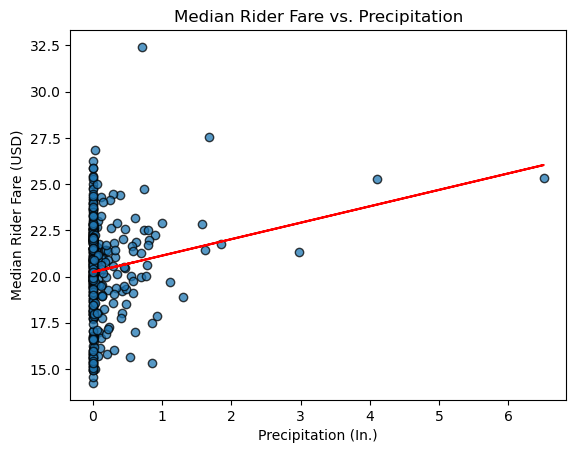

In [28]:
# Median Rider Fare vs. Precip (grouped by day)
daily_precip = rides_df.groupby(["MYDATE"])["precip"].unique()
med_fares = rides_df.groupby(["MYDATE"])["TOTAL"].median()
precip_inches = daily_precip / 25.4
x_values = precip_inches.astype(float)
y_values = med_fares.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (60, 15) ,fontsize=15,color="red")
plt.xlabel("Precipitation (In.)")
plt.ylabel("Median Rider Fare (USD)")
plt.title("Median Rider Fare vs. Precipitation")
print(f"The r-value is: {rvalue}")
plt.show()

In [11]:
rides_df.head()

,COMPANY_ID,PICKUP_TIME,TRIP_MILES,TRIP_TIME,P_TIP,DOW,PICKUP_DAY,MYDATE,TOTAL,TIP%,Borough,precip,TEMP_F,HOLIDAY,WEATHER
0,HV0005,1/18/2021 0:37,1.690,487,0.0,0,Mon,2021-01-18,13.45,0.0,Manhattan,0.0,41.18,1,Good
1,HV0005,1/23/2021 15:17,2.865,854,0.0,5,Sat,2021-01-23,15.41,0.0,Manhattan,0.0,30.20,0,Good
2,HV0003,1/28/2021 5:59,1.490,370,0.0,3,Thurs,2021-01-28,7.79,0.0,Brooklyn,0.0,28.76,0,Good
3,HV0003,1/5/2021 19:24,5.550,942,0.0,1,Tues,2021-01-05,24.66,0.0,Brooklyn,0.0,38.84,0,Good
4,HV0005,1/24/2021 0:24,1.077,455,0.0,6,Sun,2021-01-24,10.35,0.0,Brooklyn,0.0,27.32,0,Good


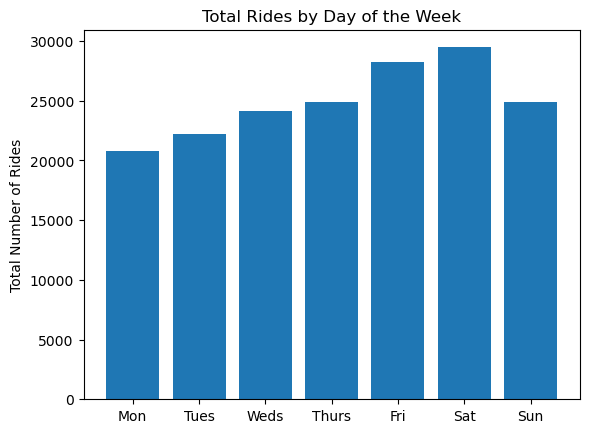

In [12]:
# Ride Count vs. Day of Week
dow_sort = rides_df.sort_values("DOW")
x_axis = dow_sort["DOW"].unique()
tick_labels = dow_sort["PICKUP_DAY"].unique()
tick_locations = [value for value in x_axis]
y_values = rides_df.groupby(["DOW"])["PICKUP_DAY"].count()
plt.bar(x_axis, y_values)
plt.xticks(tick_locations, tick_labels)
plt.title("Total Rides by Day of the Week")
plt.ylabel("Total Number of Rides")
plt.show()

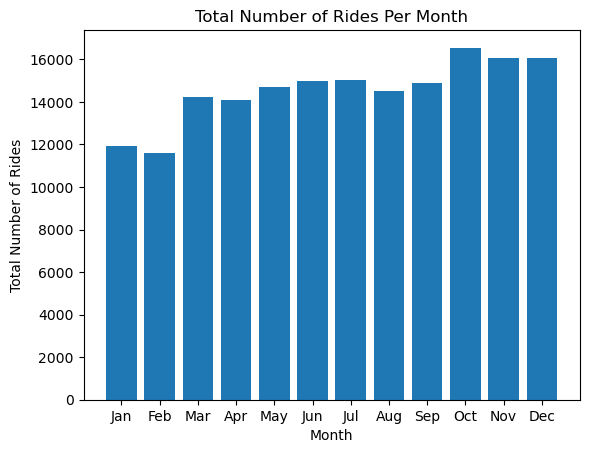

In [13]:
# Ride Count Per Month (total)
month_sort = rides_df.sort_values("MYDATE")
monthly_rides = month_sort.groupby(month_sort.MYDATE.dt.month)['HOLIDAY'].count()
monthly_rides = monthly_rides.reset_index()
monthly_rides.columns = ["MONTH", "RIDE_COUNT"]
x_values = monthly_rides["MONTH"]
y_values = monthly_rides["RIDE_COUNT"]
tick_locations = [value for value in x_values]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(tick_locations, months)
plt.bar(x_values, y_values)
plt.xlabel("Month")
plt.ylabel("Total Number of Rides")
plt.title("Total Number of Rides Per Month")
plt.show()

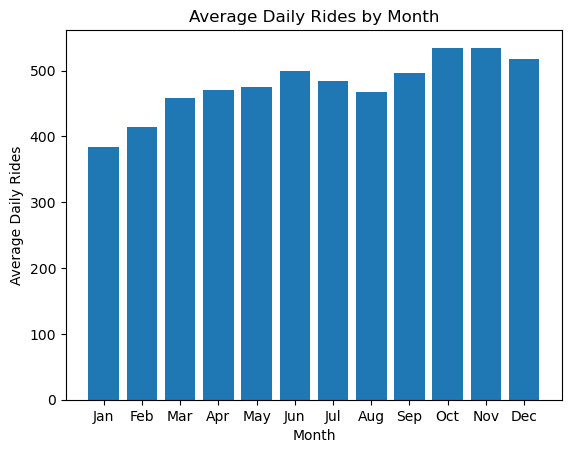

In [14]:
# Ride Count per Month (ave)
rides_df["MONTH"] = rides_df["MYDATE"].dt.month
rides_df = rides_df.sort_values("MYDATE")
days_per_month = rides_df.groupby(["MONTH"])["MYDATE"].nunique()
rides_per_month = rides_df.groupby(["MONTH"])["MYDATE"].count()
ave_rides = rides_per_month / days_per_month
x_values = rides_df["MONTH"].unique()
y_values = ave_rides
tick_locations = [value for value in x_values]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(tick_locations, months)
plt.bar(x_values, y_values)
plt.xlabel("Month")
plt.ylabel("Average Daily Rides")
plt.title("Average Daily Rides by Month")
plt.show()

In [19]:
rides_df.head()

,COMPANY_ID,PICKUP_TIME,TRIP_MILES,TRIP_TIME,P_TIP,DOW,PICKUP_DAY,MYDATE,TOTAL,TIP%,Borough,precip,TEMP_F,HOLIDAY,WEATHER,MONTH
7856,HV0005,1/1/2021 20:17,8.887,1387,8.29,4,Fri,2021-01-01,41.43,0.200097,Queens,15.33,36.5,1,Bad,1
11412,HV0003,1/1/2021 20:19,2.000,614,0.00,4,Fri,2021-01-01,14.74,0.000000,Brooklyn,15.33,36.5,1,Bad,1
11408,HV0003,1/1/2021 1:11,2.300,678,0.94,4,Fri,2021-01-01,15.59,0.060295,Manhattan,15.33,36.5,1,Bad,1
9870,HV0003,1/1/2021 17:38,1.990,495,0.00,4,Fri,2021-01-01,13.76,0.000000,Queens,15.33,36.5,1,Bad,1
1306,HV0003,1/1/2021 0:50,1.150,339,0.00,4,Fri,2021-01-01,8.85,0.000000,Brooklyn,15.33,36.5,1,Bad,1


In [34]:
# dataframe filtered to remove ride share companies
vfh_list = ["HV0002", "HV0003", "HV0004", "HV0005"]
vfh_list = ["HV0002", "HV0003", "HV0004", "HV0005"]
taxi_df = rides_df.loc[~rides_df["COMPANY_ID"].isin(vfh_list)]
taxi_df

,COMPANY_ID,PICKUP_TIME,TRIP_MILES,TRIP_TIME,P_TIP,DOW,PICKUP_DAY,MYDATE,TOTAL,TIP%,Borough,precip,TEMP_F,HOLIDAY,WEATHER,MONTH


The r-value is: 0.29917711096501626


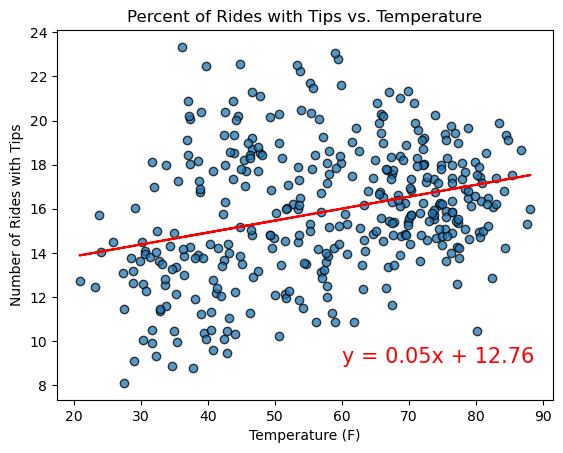

In [29]:
# Percent of rides w/ tips vs. weather conditions
daily_temp = rides_df.groupby(["MYDATE"])["TEMP_F"].unique()
ride_count = rides_df.groupby(["MYDATE"])["PICKUP_DAY"].count()
tipcount = rides_df.loc[rides_df["P_TIP"] > 0]
tips = tipcount.groupby(["MYDATE"])["PICKUP_DAY"].count()
percent_tipped = (tips / ride_count) * 100
x_values = daily_temp.astype(float)
y_values = percent_tipped.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (60, 9) ,fontsize=15,color="red")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Rides with Tips")
plt.title("Percent of Rides with Tips vs. Temperature")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.34440626093696786


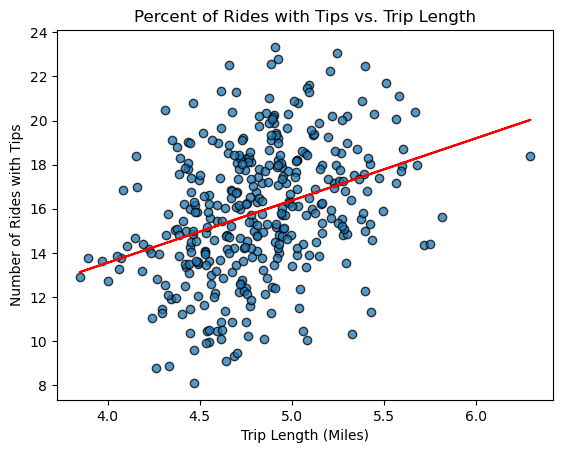

In [32]:
# Percent of rides w/ tips vs. ride length (miles)
ave_miles = rides_df.groupby(["MYDATE"])["TRIP_MILES"].mean()
ride_count = rides_df.groupby(["MYDATE"])["PICKUP_DAY"].count()
tipcount = rides_df.loc[rides_df["P_TIP"] > 0]
tips = tipcount.groupby(["MYDATE"])["PICKUP_DAY"].count()
percent_tipped = (tips / ride_count) * 100
x_values = ave_miles.astype(float)
y_values = percent_tipped.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (60, 9) ,fontsize=15,color="red")
plt.xlabel("Trip Length (Miles)")
plt.ylabel("Number of Rides with Tips")
plt.title("Percent of Rides with Tips vs. Trip Length")
print(f"The r-value is: {rvalue}")
plt.show()